<img src='http://www.shsatprep.com/images/SHSATPrepLogo.jpg'/>

1. ## Table of Contents
### Geospatial Content:

- [Geographical Student Race Distribution of New York](#map_of_newyork)

- [Asian/White Student Geospatial Distribution](#asian_white_geomap)

- [Black/Hispanic Student Geospatial Distribution](#black_hispanic_geomap)

### Student Content:
- [Correlation Matrix (Student Heatmap)](#correlation)

- [Student Race & Economic Need Index](#race_economic)

- [Low/High Student Attedance and It's Effect on Race](#school_attendance)

- [Student Math & ELA Performance by Race](#student_performance)

- [Math Test Performance By Race (Grade 3-8)](#math_test)

- [ELA Test Performance By Race (Grade 3-8)](#ela_test)

### Community and Non Community Schools Content:
- [Community VS Non-Community Schools](#community_vs_noncommunity)

- [Economic Need Index Comparison: Community VS Non-Community Schools](#economic_need)

- [Average School Income Comparison: Community VS Non-Community Schools](#avg_school_income_comparison)

- [School Per City Distribution: Which City Has the Most Schools?](#school_per_city)

- [K-Means Clustering: What Group of Schools Need Help?](#clustering)

### SHSAT Registration Content:

- [SHSAT Registration Count Distribution Per School](#registration_count)

- [SHSAT Registration Per Year (2014-2016)](#registration_per_year)

### Additional Data:
- [NYC SAT Results](#additional_sat)

- [NYC Income Census](#additional_income)




<img src='http://gifimage.net/wp-content/uploads/2017/09/anime-study-gif-9.gif'/>

# The Problem
***

**Source:** https://www.nytimes.com/2018/06/21/nyregion/what-is-the-shsat-exam-and-why-does-it-matter.html 

1. **Low Number of Black and Latino Students** in specialized High Schools.
2. Only 10% of New York City's public school students are black/latino received offers, even though 67% of public students are black/latino
3. Asians make up **62%** of students at specialized high schools, even though 16% of public students are asian
4. Whites make up **24%** of students at specialized highs schools, even though 15% of public students are white

**Hypothesis:**
Before we begin doing any analysis, it's always best to have some ideas in mind to understand why underrepresented groups of students are not receiving the help they need. Here are a few ideas:
- **Community VS Non-Community** schools should have an impact to the type of students 
- **Race** can be a proxy for a student's need of help, this is very debatable
- A school's **location** can be a proxy for students in need of help
- Student overall **performance** per school can be a proxy as well




# Exploratory Data Analysis of New York Schools
***

In [34]:
# Import the neccessary modules for data manipulation and visual representation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
#import plotly.plotly as py

In [35]:
pd.set_option('display.max_columns', None)  
df = pd.read_csv('data/2016 School Explorer.csv')
shsat = pd.read_csv('data/D5 SHSAT Registrations and Testers.csv')
safety = pd.read_csv('data/2010-2016-school-safety-report.csv')

In [36]:
df.head(3)

,Adjusted Grade,New?,Other Location Code in LCGMS,School Name,SED Code,Location Code,District,Latitude,Longitude,Address (Full),City,Zip,Grades,Grade Low,Grade High,Community School?,Economic Need Index,School Income Estimate,Percent ELL,Percent Asian,Percent Black,Percent Hispanic,Percent Black / Hispanic,Percent White,Student Attendance Rate,Percent of Students Chronically Absent,Rigorous Instruction %,Rigorous Instruction Rating,Collaborative Teachers %,Collaborative Teachers Rating,Supportive Environment %,Supportive Environment Rating,Effective School Leadership %,Effective School Leadership Rating,Strong Family-Community Ties %,Strong Family-Community Ties Rating,Trust %,Trust Rating,Student Achievement Rating,Average ELA Proficiency,Average Math Proficiency,Grade 3 ELA - All Students Tested,Grade 3 ELA 4s - All Students,Grade 3 ELA 4s - American Indian or Alaska Native,Grade 3 ELA 4s - Black or African American,Grade 3 ELA 4s - Hispanic or Latino,Grade 3 ELA 4s - Asian or Pacific Islander,Grade 3 ELA 4s - White,Grade 3 ELA 4s - Multiracial,Grade 3 ELA 4s - Limited English Proficient,Grade 3 ELA 4s - Economically Disadvantaged,Grade 3 Math - All Students tested,Grade 3 Math 4s - All Students,Grade 3 Math 4s - American Indian or Alaska Native,Grade 3 Math 4s - Black or African American,Grade 3 Math 4s - Hispanic or Latino,Grade 3 Math 4s - Asian or Pacific Islander,Grade 3 Math 4s - White,Grade 3 Math 4s - Multiracial,Grade 3 Math 4s - Limited English Proficient,Grade 3 Math 4s - Economically Disadvantaged,Grade 4 ELA - All Students Tested,Grade 4 ELA 4s - All Students,Grade 4 ELA 4s - American Indian or Alaska Native,Grade 4 ELA 4s - Black or African American,Grade 4 ELA 4s - Hispanic or Latino,Grade 4 ELA 4s - Asian or Pacific Islander,Grade 4 ELA 4s - White,Grade 4 ELA 4s - Multiracial,Grade 4 ELA 4s - Limited English Proficient,Grade 4 ELA 4s - Economically Disadvantaged,Grade 4 Math - All Students Tested,Grade 4 Math 4s - All Students,Grade 4 Math 4s - American Indian or Alaska Native,Grade 4 Math 4s - Black or African American,Grade 4 Math 4s - Hispanic or Latino,Grade 4 Math 4s - Asian or Pacific Islander,Grade 4 Math 4s - White,Grade 4 Math 4s - Multiracial,Grade 4 Math 4s - Limited English Proficient,Grade 4 Math 4s - Economically Disadvantaged,Grade 5 ELA - All Students Tested,Grade 5 ELA 4s - All Students,Grade 5 ELA 4s - American Indian or Alaska Native,Grade 5 ELA 4s - Black or African American,Grade 5 ELA 4s - Hispanic or Latino,Grade 5 ELA 4s - Asian or Pacific Islander,Grade 5 ELA 4s - White,Grade 5 ELA 4s - Multiracial,Grade 5 ELA 4s - Limited English Proficient,Grade 5 ELA 4s - Economically Disadvantaged,Grade 5 Math - All Students Tested,Grade 5 Math 4s - All Students,Grade 5 Math 4s - American Indian or Alaska Native,Grade 5 Math 4s - Black or African American,Grade 5 Math 4s - Hispanic or Latino,Grade 5 Math 4s - Asian or Pacific Islander,Grade 5 Math 4s - White,Grade 5 Math 4s - Multiracial,Grade 5 Math 4s - Limited English Proficient,Grade 5 Math 4s - Economically Disadvantaged,Grade 6 ELA - All Students Tested,Grade 6 ELA 4s - All Students,Grade 6 ELA 4s - American Indian or Alaska Native,Grade 6 ELA 4s - Black or African American,Grade 6 ELA 4s - Hispanic or Latino,Grade 6 ELA 4s - Asian or Pacific Islander,Grade 6 ELA 4s - White,Grade 6 ELA 4s - Multiracial,Grade 6 ELA 4s - Limited English Proficient,Grade 6 ELA 4s - Economically Disadvantaged,Grade 6 Math - All Students Tested,Grade 6 Math 4s - All Students,Grade 6 Math 4s - American Indian or Alaska Native,Grade 6 Math 4s - Black or African American,Grade 6 Math 4s - Hispanic or Latino,Grade 6 Math 4s - Asian or Pacific Islander,Grade 6 Math 4s - White,Grade 6 Math 4s - Multiracial,Grade 6 Math 4s - Limited English Proficient,Grade 6 Math 4s - Economically Disadvantaged,Grade 7 ELA - All Students Tested,Grade 7 ELA 4s - All Students,Grade 7 ELA 4s - American Indian or Alaska Native,Grade 7 ELA 4s - Black or African American,Grade 7 ELA 4s - His

In [37]:
# There are 1272 schools in the data set
df.shape

(1272, 161)

In [38]:
# Preprocess some data
# Create a function to convert the percentage to a fraction 
def p2f(x):
    return float(x.strip('%'))/100

df['Percent of Students Chronically Absent']=df['Percent of Students Chronically Absent'].astype(str).apply(p2f)
df['Rigorous Instruction %'] = df['Rigorous Instruction %'].astype(str).apply(p2f)
df['Collaborative Teachers %'] = df['Collaborative Teachers %'].astype(str).apply(p2f)
df['Supportive Environment %'] = df['Supportive Environment %'].astype(str).apply(p2f)
df['Effective School Leadership %'] = df['Effective School Leadership %'].astype(str).apply(p2f)
df['Strong Family-Community Ties %'] = df['Strong Family-Community Ties %'].astype(str).apply(p2f)
df['Trust %'] = df['Trust %'].astype(str).apply(p2f)
df['Student Attendance Rate'] = df['Student Attendance Rate'].astype(str).apply(p2f)

<a id='map_of_newyork'></a>
# Map of New York
***

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/3/3d/Map_of_New_York_Economic_Regions.svg/2000px-Map_of_New_York_Economic_Regions.svg.png'/>

# New York Map of Economic Need Index Distribution
***

**More Red** =  Schools with **Higher Economic Need**

**More Blue**  = School with **Less Economic Need**

### Upper and Central New York Needs More Help
Schools that are located in the **Upper and Central New York Area** have a **higher** economic need

In [39]:
df['School Income Estimate'] = df['School Income Estimate'].str.replace(',', '')
df['School Income Estimate'] = df['School Income Estimate'].str.replace('$', '')
df['School Income Estimate'] = df['School Income Estimate'].str.replace(' ', '')
df['School Income Estimate'] = df['School Income Estimate'].astype(float)

In [40]:
df['School Income Estimate'] = df['School Income Estimate'].fillna(0)
df['Economic Need Index'] = df['Economic Need Index'].fillna(0)


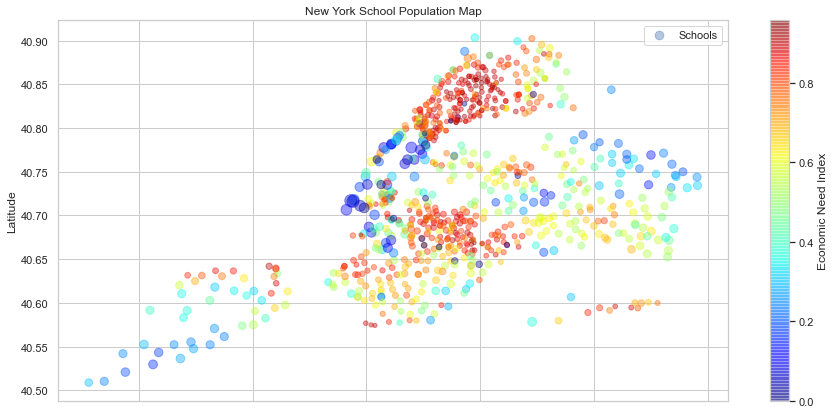

In [41]:
# Static Version
df.plot(kind="scatter", x="Longitude", y="Latitude",
    s=df['School Income Estimate']/1210, c="Economic Need Index", cmap=plt.get_cmap("jet"),
        label='Schools', title='New York School Population Map',colorbar=True, alpha=0.4, figsize=(15,7))
plt.legend()
plt.show()

In [42]:
data = [
    {
        'x': df["Longitude"],
        'y': df["Latitude"],
        'text': df["School Name"],
        'mode': 'markers',
        'marker': {
            'color': df["Economic Need Index"],
            'size': df["School Income Estimate"]/4500,
            'showscale': True,
            'colorscale':'Portland'
        }
    }
]

layout= go.Layout(
    title= 'New York School Population (Economic Need Index)',
    xaxis= dict(
        title= 'Longitude'
    ),
    yaxis=dict(
        title='Latitude'
    ))
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='scatter_hover_labels')

<a id='black_hispanic_geomap'></a>
# New York Map of Black/Hispanic Percentage of Schools
***

In [43]:
df['Percent Asian'] = df['Percent Asian'].apply(p2f)
df['Percent Black'] = df['Percent Black'].apply(p2f)
df['Percent Hispanic'] = df['Percent Hispanic'].apply(p2f)
df['Percent White'] = df['Percent White'].apply(p2f)
df['Percent Black / Hispanic'] = df['Percent Black / Hispanic'].apply(p2f)

### Central New York contains most of the Schools with Blacks
Majority of the **black** population are living in **Central New York**. If you compare this to the Hispanic Population, they are totally isolated from each other. 

In [44]:
data = [
    {
        'x': df["Longitude"],
        'y': df["Latitude"],
        'text': df["School Name"],
        'mode': 'markers',
        'marker': {
            'color': df["Percent Black"],
            'size': df["School Income Estimate"]/4500,
            'showscale': True,
            'colorscale':'Portland'
        }
    }
]

layout= go.Layout(
    title= 'New York Black Student Ratio Of School',
    xaxis= dict(
        title= 'Longitude'
    ),
    yaxis=dict(
        title='Latitude'
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='scatter_hover_labels')

### Upper New York contains most of the Schools with Hispanics
Majority of the **hispanic** population are living in **Upper New York**. Again, notice how there are a few Hispanics in Central New York while there are a majority of Blacks in Central New York.

In [45]:
data = [
    {
        'x': df["Longitude"],
        'y': df["Latitude"],
        'text': df["School Name"],
        'mode': 'markers',
        'marker': {
            'color': df["Percent Hispanic"],
            'size': df["School Income Estimate"]/4500,
            'showscale': True,
            'colorscale':'Portland'
        }
    }
]

layout= go.Layout(
    title= 'New York Hispanic Student Ratio Of School',
    xaxis= dict(
        title= 'Longitude'
    ),
    yaxis=dict(
        title='Latitude'
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='scatter_hover_labels')

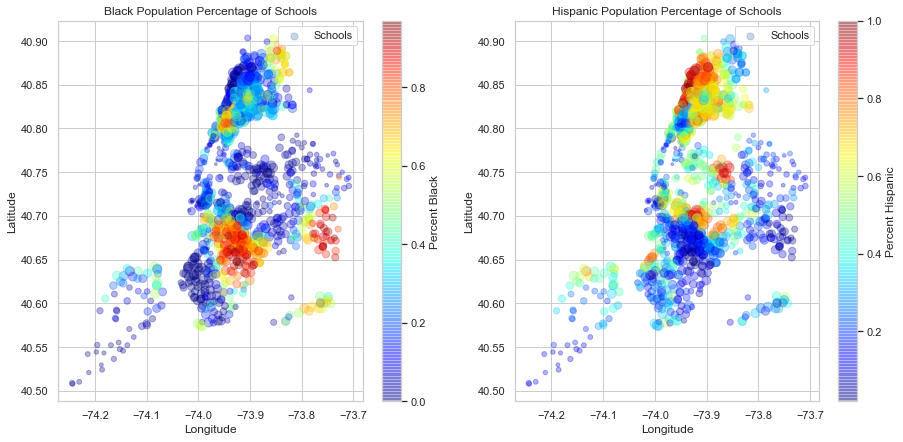

In [46]:
# Static Figure
# Set up the matplotlib figure
f, axes = plt.subplots(ncols=2, figsize=(15, 6))

df.plot(kind="scatter", x="Longitude", y="Latitude", ax=axes[0],
    s=df['Economic Need Index']*100, c="Percent Black", cmap=plt.get_cmap("jet"),label='Schools', title='Black Population Percentage of Schools',
    colorbar=True, alpha=0.3, figsize=(15,7))

df.plot(kind="scatter", x="Longitude", y="Latitude", ax=axes[1],
    s=df['Economic Need Index']*100, c="Percent Hispanic", cmap=plt.get_cmap("jet"),label='Schools', title='Hispanic Population Percentage of Schools',
    colorbar=True, alpha=0.3, figsize=(15,7))

plt.legend()
plt.show()

<a id='asian_white_geomap'></a>
# New York Map of Asian/White Percentage of Schools

The **Asian** population are mostly living in Central New York.

The **White** Population has a very noticeable cluster near the **edge and lower** parts of New York.

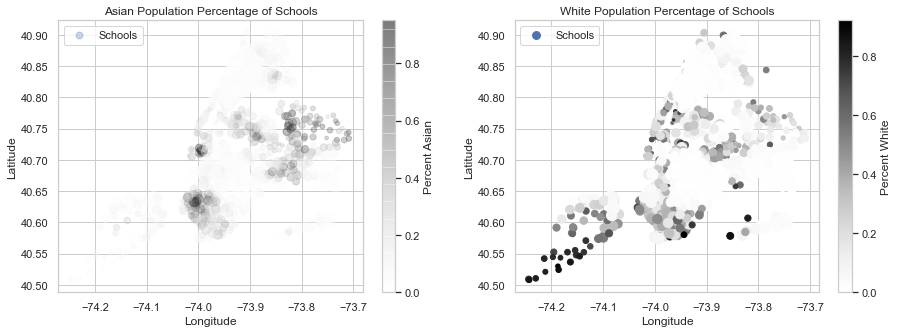

In [47]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols=2, figsize=(15, 6))

df.plot(kind="scatter", x="Longitude", y="Latitude", ax=axes[0],
    s=df['Economic Need Index']*100, c="Percent Asian", label='Schools', title='Asian Population Percentage of Schools',
    colorbar=True, alpha=0.3, figsize=(15,5))

df.plot(kind="scatter", x="Longitude", y="Latitude", ax=axes[1],
    s=df['Economic Need Index']*130, c="Percent White", label='Schools', title='White Population Percentage of Schools',
    colorbar=True, alpha=1, figsize=(15,5))

plt.legend()
plt.show()

# Race Percentage Distribution from Schools
***

**Interesting Find:**

- Majority of **Whites and Asians** are representing **10%** of the school's population
- **Blacks and Hispanics** represent majority of the school's population

<img src='https://i.imgur.com/Zo3b3jC.gif'/>

### White and Asian Distribution


C:\Users\Daney\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0, 0.5, 'Employee Count')

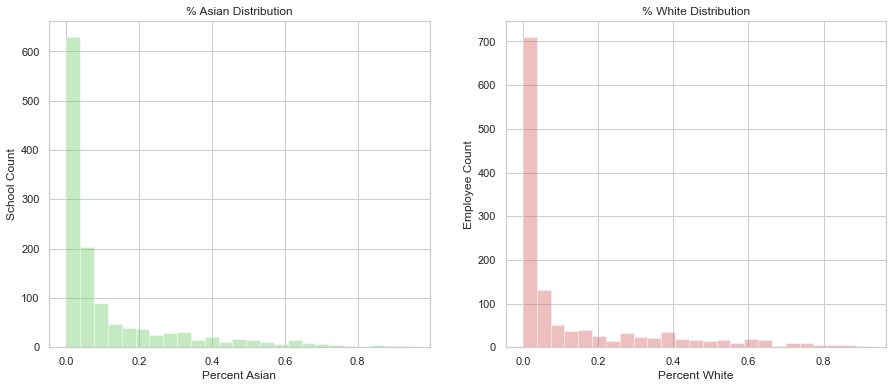

In [48]:

# Set up the matplotlib figure
f, axes = plt.subplots(ncols=2, figsize=(15, 6))

# Graph Employee Satisfaction
sns.distplot(df['Percent Asian'], kde=False, color="g", ax=axes[0], bins=25).set_title('% Asian Distribution')
axes[0].set_ylabel('School Count')

# Graph Employee Evaluation
sns.distplot(df['Percent White'], kde=False, color="r", ax=axes[1], bins=25).set_title('% White Distribution')
axes[1].set_ylabel('Employee Count')

### Blacks and Hispanics Distribution

Text(0, 0.5, 'Employee Count')

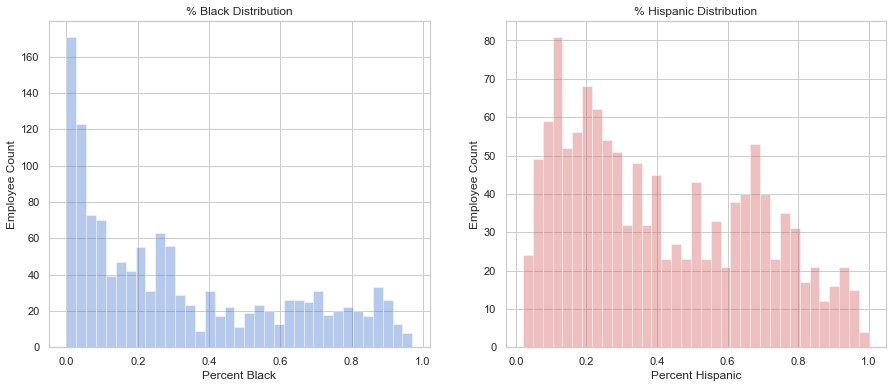

In [49]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols=2, figsize=(15, 6))

# Graph Employee Average Monthly Hours
sns.distplot(df['Percent Black'], kde=False, color="b", ax=axes[0], bins=35).set_title('% Black Distribution')
axes[0].set_ylabel('Employee Count')

# Graph Employee Average Monthly Hours
sns.distplot(df['Percent Hispanic'], kde=False, color="r", ax=axes[1], bins=35).set_title('% Hispanic Distribution')
axes[1].set_ylabel('Employee Count')


In [50]:
df.head(1)

,Adjusted Grade,New?,Other Location Code in LCGMS,School Name,SED Code,Location Code,District,Latitude,Longitude,Address (Full),City,Zip,Grades,Grade Low,Grade High,Community School?,Economic Need Index,School Income Estimate,Percent ELL,Percent Asian,Percent Black,Percent Hispanic,Percent Black / Hispanic,Percent White,Student Attendance Rate,Percent of Students Chronically Absent,Rigorous Instruction %,Rigorous Instruction Rating,Collaborative Teachers %,Collaborative Teachers Rating,Supportive Environment %,Supportive Environment Rating,Effective School Leadership %,Effective School Leadership Rating,Strong Family-Community Ties %,Strong Family-Community Ties Rating,Trust %,Trust Rating,Student Achievement Rating,Average ELA Proficiency,Average Math Proficiency,Grade 3 ELA - All Students Tested,Grade 3 ELA 4s - All Students,Grade 3 ELA 4s - American Indian or Alaska Native,Grade 3 ELA 4s - Black or African American,Grade 3 ELA 4s - Hispanic or Latino,Grade 3 ELA 4s - Asian or Pacific Islander,Grade 3 ELA 4s - White,Grade 3 ELA 4s - Multiracial,Grade 3 ELA 4s - Limited English Proficient,Grade 3 ELA 4s - Economically Disadvantaged,Grade 3 Math - All Students tested,Grade 3 Math 4s - All Students,Grade 3 Math 4s - American Indian or Alaska Native,Grade 3 Math 4s - Black or African American,Grade 3 Math 4s - Hispanic or Latino,Grade 3 Math 4s - Asian or Pacific Islander,Grade 3 Math 4s - White,Grade 3 Math 4s - Multiracial,Grade 3 Math 4s - Limited English Proficient,Grade 3 Math 4s - Economically Disadvantaged,Grade 4 ELA - All Students Tested,Grade 4 ELA 4s - All Students,Grade 4 ELA 4s - American Indian or Alaska Native,Grade 4 ELA 4s - Black or African American,Grade 4 ELA 4s - Hispanic or Latino,Grade 4 ELA 4s - Asian or Pacific Islander,Grade 4 ELA 4s - White,Grade 4 ELA 4s - Multiracial,Grade 4 ELA 4s - Limited English Proficient,Grade 4 ELA 4s - Economically Disadvantaged,Grade 4 Math - All Students Tested,Grade 4 Math 4s - All Students,Grade 4 Math 4s - American Indian or Alaska Native,Grade 4 Math 4s - Black or African American,Grade 4 Math 4s - Hispanic or Latino,Grade 4 Math 4s - Asian or Pacific Islander,Grade 4 Math 4s - White,Grade 4 Math 4s - Multiracial,Grade 4 Math 4s - Limited English Proficient,Grade 4 Math 4s - Economically Disadvantaged,Grade 5 ELA - All Students Tested,Grade 5 ELA 4s - All Students,Grade 5 ELA 4s - American Indian or Alaska Native,Grade 5 ELA 4s - Black or African American,Grade 5 ELA 4s - Hispanic or Latino,Grade 5 ELA 4s - Asian or Pacific Islander,Grade 5 ELA 4s - White,Grade 5 ELA 4s - Multiracial,Grade 5 ELA 4s - Limited English Proficient,Grade 5 ELA 4s - Economically Disadvantaged,Grade 5 Math - All Students Tested,Grade 5 Math 4s - All Students,Grade 5 Math 4s - American Indian or Alaska Native,Grade 5 Math 4s - Black or African American,Grade 5 Math 4s - Hispanic or Latino,Grade 5 Math 4s - Asian or Pacific Islander,Grade 5 Math 4s - White,Grade 5 Math 4s - Multiracial,Grade 5 Math 4s - Limited English Proficient,Grade 5 Math 4s - Economically Disadvantaged,Grade 6 ELA - All Students Tested,Grade 6 ELA 4s - All Students,Grade 6 ELA 4s - American Indian or Alaska Native,Grade 6 ELA 4s - Black or African American,Grade 6 ELA 4s - Hispanic or Latino,Grade 6 ELA 4s - Asian or Pacific Islander,Grade 6 ELA 4s - White,Grade 6 ELA 4s - Multiracial,Grade 6 ELA 4s - Limited English Proficient,Grade 6 ELA 4s - Economically Disadvantaged,Grade 6 Math - All Students Tested,Grade 6 Math 4s - All Students,Grade 6 Math 4s - American Indian or Alaska Native,Grade 6 Math 4s - Black or African American,Grade 6 Math 4s - Hispanic or Latino,Grade 6 Math 4s - Asian or Pacific Islander,Grade 6 Math 4s - White,Grade 6 Math 4s - Multiracial,Grade 6 Math 4s - Limited English Proficient,Grade 6 Math 4s - Economically Disadvantaged,Grade 7 ELA - All Students Tested,Grade 7 ELA 4s - All Students,Grade 7 ELA 4s - American Indian or Alaska Native,Grade 7 ELA 4s - Black or African American,Grade 7 ELA 4s - His

<img src='https://static.wixstatic.com/media/e5b05f_8e0f67f402404d7a9307fe5115d9f40d~mv2.gif'/>

<a id='correlation'></a>
# Correlation Matrix 
***

Using our numeric features, let's take a look at our correlation matrix. **Here are some interesting correlations:**

### Economic Need Index
- Schools with **more White Students** have a **lower economic need index**, meaning the schools are operating just fine without the need of help.
- Schools with **more Asian Students** have a **slightly lower economic need index**.
- Schools with **more Black/Hispanic Students** have a **higher economic need index**, meaning the schools are in need of help.
- Schools with **more Chronically Absent Students** have a **higher economic need index**

### School Income Estimate
- Schools with **more White/Asian Students** have a **higher school income estimate**.
- Schools with **more Black/Hispanic Students** have a **lower school income estimate**


<AxesSubplot:>

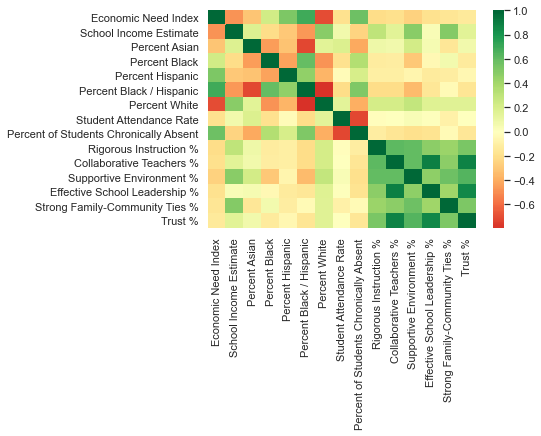

In [51]:
df2 = df.iloc[:,[16,17,19,20,21,22,23,24,25,26,28,30,32,34,36]]
#Correlation Matrix
corr = df2.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap="RdYlGn", center=0)

<a id='race_economic'></a>
# Student Race & Economic Need Index
***

This is a really interesting find:
- Schools with a **Higher White and Asian** Population tend to have a **Lower Economic Need Index Score**.
- Schools with a **Higher Hispanic and Black** Population tend to have a **Higher Economic Need Index Score**.

Our main focus should be to try and understand what is making the **Hispanic and Black** Students in need of help.

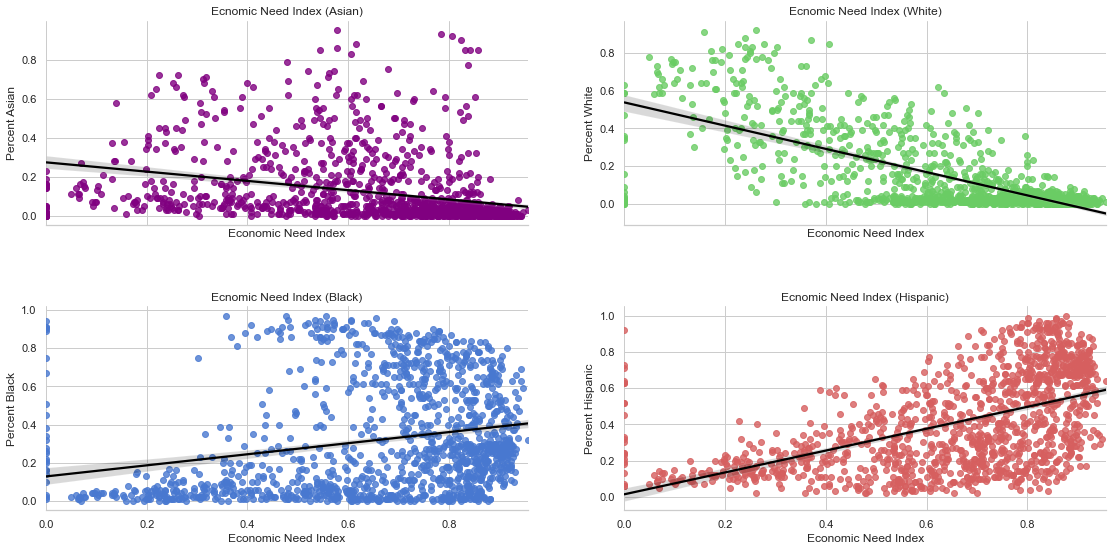

In [52]:
f, axes = plt.subplots(2, 2, figsize=(19, 9), sharex=True)
sns.despine(left=True)

sns.regplot(x=df["Economic Need Index"], y=df["Percent Asian"], color='purple', ax=axes[0, 0], line_kws={"color": "black"})
sns.regplot(x=df["Economic Need Index"], y=df["Percent White"], color='g', ax=axes[0, 1], line_kws={"color": "black"})
sns.regplot(x=df["Economic Need Index"], y=df["Percent Black"], color='b', ax=axes[1, 0], line_kws={"color": "black"})
sns.regplot(x=df["Economic Need Index"], y=df["Percent Hispanic"], color='r', ax=axes[1, 1], line_kws={"color": "black"})

axes[0,0].set_title('Ecnomic Need Index (Asian)')
axes[0,1].set_title('Ecnomic Need Index (White)')
axes[1,0].set_title('Ecnomic Need Index (Black)')
axes[1,1].set_title('Ecnomic Need Index (Hispanic)')

plt.subplots_adjust(hspace=0.4)


<a id='school_attendance'></a>
# Schools and Student Attendance 
***

### Question
Is there a difference between the students in schools with higher-to-lower attendance rate?

Our goal is to find good **proxies** for **underdeveloped schools**. Let's see if there are any differences between the attendance rate.

### Idea
With these two groups, we can perform some **hypothesis testing** to see if there really are any statistical significance of different metrics (ex. Income, Economic Index Need, and Race) between Schools with 30% Absent Rate and 10% Absent Rate.

### Interesting Find
As you can see, the **average absent rate** for students is about **20%**.

Let's dive in deep to understand if there are any real differences between schools with an **absent rate of <= 11%** and an **absent rate of >= 30%**.

In [53]:
# Create a dataframe of schools with an absent rate of 30% or more.
absent_30 = df[df['Percent of Students Chronically Absent']>=.30]

# Create a dataframe of schools with an absent rate of 11% or less.
absent_11 = df[df['Percent of Students Chronically Absent']<=.11]

# Exploring School Absent Rate 
df['Percent of Students Chronically Absent'].describe()

count    1247.000000
mean        0.215750
std         0.140716
min         0.000000
25%         0.110000
50%         0.200000
75%         0.300000
max         1.000000
Name: Percent of Students Chronically Absent, dtype: float64

## Schools with 30% Absent Ratio:
- Average **Economic Need Index** at **84%**
- Average **School Income** at **$33,000**
- **Asians and Whites** make up about **5%** of the students in these schools.
- **Blacks and Hispanics** make up about **95%** of the students in these schools.

## Schools with 10% Absent Ratio:
- Average **Economic Need Index** at **48%**
- Average **School Income** at **$64,000**
- **Asians and Whites** make up about **52%** of the students in these schools.
- **Blacks and Hispanics** make up about **48%** of the students in these schools.

### Schools with 30% Absent Rate

In [54]:
absent_30.iloc[:,[15,16,17,23,19,20,21,22]].describe()

,Economic Need Index,School Income Estimate,Percent White,Percent Asian,Percent Black,Percent Hispanic,Percent Black / Hispanic
count,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000
mean,0.840624,24213.924788,0.025455,0.027212,0.455091,0.477121,0.932121
std,0.080521,17646.702137,0.040520,0.039312,0.225843,0.228938,0.066482
min,0.369000,0.000000,0.000000,0.000000,0.010000,0.020000,0.480000
25%,0.807500,0.000000,0.010000,0.010000,0.260000,0.270000,0.920000
50%,0.857500,27338.415000,0.020000,0.010000,0.440000,0.485000,0.950000
75%,0.898750,35521.105000,0.030000,0.030000,0.660000,0.680000,0.970000
max,0.957000,79244.110000,0.460000,0.320000,0.950000,0.920000,0.990000


### Schools with 10% Absent Rate

In [55]:
absent_11.iloc[:,[3,15,16,17,23,19,20,21,22]].describe()

,Economic Need Index,School Income Estimate,Percent White,Percent Asian,Percent Black,Percent Hispanic,Percent Black / Hispanic
count,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000
mean,0.484862,44751.846319,0.254632,0.238436,0.187239,0.293374,0.480644
std,0.226285,36657.241653,0.249776,0.246289,0.272421,0.245842,0.325940
min,0.049000,0.000000,0.000000,0.000000,0.000000,0.020000,0.030000
25%,0.295250,0.000000,0.020000,0.040000,0.020000,0.120000,0.200000
50%,0.488500,46699.660000,0.180000,0.140000,0.060000,0.200000,0.370000
75%,0.682000,69124.027500,0.437500,0.397500,0.220000,0.397500,0.870000
max,0.878000,181382.060000,0.910000,0.950000,0.970000,1.000000,1.000000


## Location of High and Low Absent Rate Schools
***

## Shools with 30% Absent Rate
The schools with **30%** absent rate are **more clumped** in the **Central** and **Upper** regions of New York.

In [56]:
data = [
    {
        'x': absent_30["Longitude"],
        'y': absent_30["Latitude"],
        'text': absent_30["School Name"],
        'mode': 'markers',
        'marker': {
            'color': df["Economic Need Index"],
            'size': df["School Income Estimate"]/4500,
            'showscale': True,
            'colorscale':'Portland'
        }
    }
]

layout= go.Layout(
    title= 'Schools with 30% Absent Rate',
    xaxis= dict(
        title= 'Longitude'
    ),
    yaxis=dict(
        title='Latitude'
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='scatter_hover_labels')

## Scools with 10% Absent Rate
The scools with **10%** absent rate are **more dispersed** around the New York area.

In [57]:
data = [
    {
        'x': absent_11["Longitude"],
        'y': absent_11["Latitude"],
        'text': absent_11["School Name"],
        'mode': 'markers',
        'marker': {
            'color': df["Economic Need Index"],
            'size': df["School Income Estimate"]/4500,
            'showscale': True,
            'colorscale':'Portland'
        }
    }
]

layout= go.Layout(
    title= 'Schools with 10% Absent Rate',
    xaxis= dict(
        title= 'Longitude'
    ),
    yaxis=dict(
        title='Latitude'
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='scatter_hover_labels')

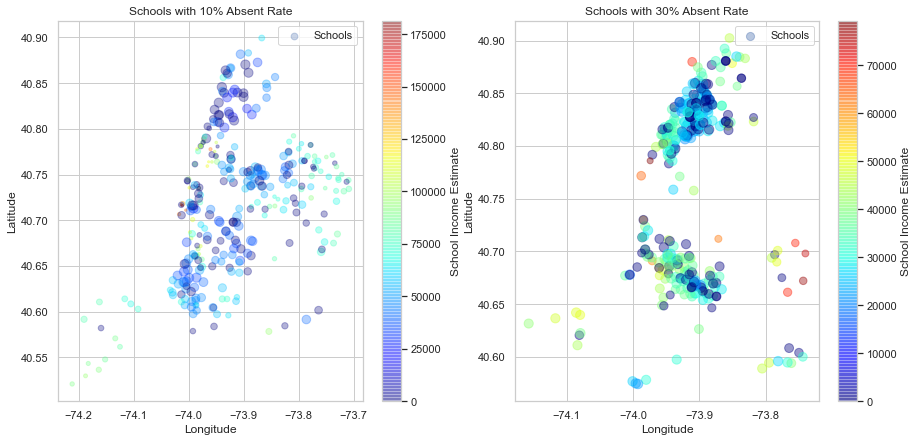

In [58]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols=2, figsize=(15, 6))

absent_11.plot(kind="scatter", x="Longitude", y="Latitude", ax=axes[0],
    s=absent_11['Economic Need Index']*100, c="School Income Estimate", cmap=plt.get_cmap("jet"),label='Schools', title='Schools with 10% Absent Rate',
    colorbar=True, alpha=0.3, figsize=(15,7))

absent_30.plot(kind="scatter", x="Longitude", y="Latitude", ax=axes[1],
    s=absent_30['Economic Need Index']*100, c="School Income Estimate", cmap=plt.get_cmap("jet"),label='Schools', title='Schools with 30% Absent Rate',
    colorbar=True, alpha=0.4, figsize=(15,7))

plt.show()

<img src='https://cdn.dribbble.com/users/634508/screenshots/3192625/designschool_dribbble_2.gif'/>

<a id='student_performance'></a>
# Student ELA & Math Performance  By Race
***

This is a very debatable topic, but it is something I really wanted to share. 

I've split up the samples into two groups: 
- **Black/Hispanic Dominant** 
- **White/Asian Dominant**

My splitting criteria for Black/Hispanic Dominant Schools were if **Percent Black/Hispanic >= 70%**, else it'll be White/Asian Dominant.
***

**Interesting Find:**

- **Black/Hispanic** dominant schools have an Average **ELA Score** of **2.35**.
- **Black/Hispanic** dominant schools have an Average **Math Score** of **2.44**.


- **White/Asian** dominant schools have an Average **ELA Score** of  **3.04**.
- **White/Asian** dominant schools have an Average **Math Score** of  **3.32**.

And if you look at the distributions of both groups below, you can definitely see a clear distinction between the **Quality of Math and ELA Performance**. 


In [59]:
# Display the Mean ELA and Math Scores for Black/Hispanic Dominant Schools
df[df['Percent Black / Hispanic'] >= .70][['Average ELA Proficiency','Average Math Proficiency']].mean()

Average ELA Proficiency     2.352136
Average Math Proficiency    2.439736
dtype: float64

In [60]:
# Display the Mean ELA and Math Scores for White/Asian Dominant Schools
df[df['Percent Black / Hispanic'] <= .30][['Average ELA Proficiency','Average Math Proficiency']].mean()

Average ELA Proficiency     3.046919
Average Math Proficiency    3.326919
dtype: float64

## Average Math Scores for Schools by Gender
***

Text(0, 0.5, 'Frequency Count')

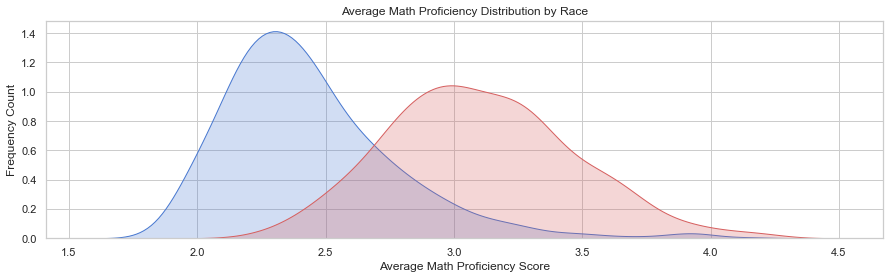

In [61]:
# Create New Column for Black/Hispanic Dominant Schools
df['Black_Hispanic_Dominant'] = df['Percent Black / Hispanic'] >= .70

#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['Black_Hispanic_Dominant'] == True),'Average Math Proficiency'] , color='b',shade=True, label='Black/Hispanic Dominant School')
ax=sns.kdeplot(df.loc[(df['Black_Hispanic_Dominant'] == False),'Average Math Proficiency'] , color='r',shade=True, label='Asian/White Dominant School')
plt.title('Average Math Proficiency Distribution by Race')
plt.xlabel('Average Math Proficiency Score')
plt.ylabel('Frequency Count')

## Average ELA Scores for Schools by Gender
***

Text(0, 0.5, 'Frequency Count')

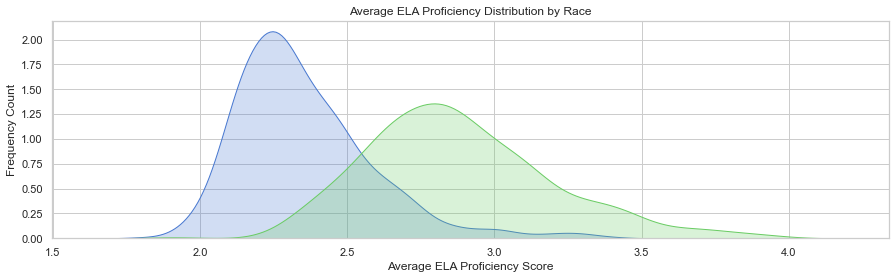

In [62]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['Black_Hispanic_Dominant'] == True),'Average ELA Proficiency'] , color='b',shade=True, label='Black/Hispanic Dominant School')
ax=sns.kdeplot(df.loc[(df['Black_Hispanic_Dominant'] == False),'Average ELA Proficiency'] , color='g',shade=True, label='Asian/White Dominant School')
plt.title('Average ELA Proficiency Distribution by Race')
plt.xlabel('Average ELA Proficiency Score')
plt.ylabel('Frequency Count')

<a id='math_test'></a>
# Math Test Performance By Race (Grade 3 - 8)
***

From the graph below, **Asians and Whites** have a **higher** count of scoring **4s on their Math Test**. 

**Blacks and Hispanics** have a **low** count for scoring **4s on their Math Test**.

In [63]:
# Create the math scores for each race
asian_math = []
asian_math.append(sum(df['Grade 3 Math 4s - Asian or Pacific Islander']))
asian_math.append(sum(df['Grade 4 Math 4s - Asian or Pacific Islander']))
asian_math.append(sum(df['Grade 5 Math 4s - Asian or Pacific Islander']))
asian_math.append(sum(df['Grade 6 Math 4s - Asian or Pacific Islander']))
asian_math.append(sum(df['Grade 7 Math 4s - Asian or Pacific Islander']))
asian_math.append(sum(df['Grade 8 Math 4s - Asian or Pacific Islander']))

white_math = []
white_math.append(sum(df['Grade 3 Math 4s - White']))
white_math.append(sum(df['Grade 4 Math 4s - White']))
white_math.append(sum(df['Grade 5 Math 4s - White']))
white_math.append(sum(df['Grade 6 Math 4s - White']))
white_math.append(sum(df['Grade 7 Math 4s - White']))
white_math.append(sum(df['Grade 8 Math 4s - White']))

black_math = []
black_math.append(sum(df['Grade 3 Math 4s - Black or African American']))
black_math.append(sum(df['Grade 4 Math 4s - Black or African American']))
black_math.append(sum(df['Grade 5 Math 4s - Black or African American']))
black_math.append(sum(df['Grade 6 Math 4s - Black or African American']))
black_math.append(sum(df['Grade 7 Math 4s - Black or African American']))
black_math.append(sum(df['Grade 8 Math 4s - Black or African American']))

hispanic_math = []
hispanic_math.append(sum(df['Grade 3 Math 4s - Hispanic or Latino']))
hispanic_math.append(sum(df['Grade 4 Math 4s - Hispanic or Latino']))
hispanic_math.append(sum(df['Grade 5 Math 4s - Hispanic or Latino']))
hispanic_math.append(sum(df['Grade 6 Math 4s - Hispanic or Latino']))
hispanic_math.append(sum(df['Grade 7 Math 4s - Hispanic or Latino']))
hispanic_math.append(sum(df['Grade 8 Math 4s - Hispanic or Latino']))

In [64]:
# Create dataframe of math scores
race_mathscores = pd.DataFrame({'Asian Math':asian_math,'Black Math':black_math,'White Math':white_math, 'Hispanic Math':hispanic_math})
race_mathscores['Grade'] = [3,4,5,6,7,8]
race_mathscores

,Asian Math,Black Math,White Math,Hispanic Math,Grade
0,5121,2869,3829,3581,3
1,5024,2240,3704,3457,4
2,4133,1120,2992,2115,5
3,5456,1856,3804,2907,6
4,4282,951,2947,1730,7
5,2524,776,1235,1205,8


In [65]:
# Create a trace
trace = go.Scatter(
    x = race_mathscores['Grade'],
    y = race_mathscores['Asian Math'],
    name = 'Asian Students'
)

trace2 = go.Scatter(
    x = race_mathscores['Grade'],
    y = race_mathscores['Hispanic Math'],
    name = 'Hispanic Students'
)

trace3 = go.Scatter(
    x = race_mathscores['Grade'],
    y = race_mathscores['Black Math'],
    name = 'Black Students'
)

trace4 = go.Scatter(
    x = race_mathscores['Grade'],
    y = race_mathscores['White Math'],
    name = 'White Students'
)

layout= go.Layout(
    title= 'Student Math 4s Performance By Grade (Race)',
    xaxis= dict(
        title= 'Grade Level'
    ),
    yaxis=dict(
        title='# of Students Receiving Math 4s'
    )
)

data = [trace, trace2, trace3, trace4]

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='scatter_hover_labels')

<a id='ela_test'></a>
# ELA Test Performance By Race (Grade 3-8)
***

**Asians** still dominate test performance with **ELA 4s**. What really caught my attention was the spike of score increase from **Grade 5-6** for **Asians**. 

Also, compared to the Math 4s, there is an **increase in performance over time** for **ELA 4s**.

In [66]:
# Create the math scores for each race
asian_ELA = []
asian_ELA.append(sum(df['Grade 3 ELA 4s - Asian or Pacific Islander']))
asian_ELA.append(sum(df['Grade 4 ELA 4s - Asian or Pacific Islander']))
asian_ELA.append(sum(df['Grade 5 ELA 4s - Asian or Pacific Islander']))
asian_ELA.append(sum(df['Grade 6 ELA 4s - Asian or Pacific Islander']))
asian_ELA.append(sum(df['Grade 7 ELA 4s - Asian or Pacific Islander']))
asian_ELA.append(sum(df['Grade 8 ELA 4s - Asian or Pacific Islander']))

white_ELA = []
white_ELA.append(sum(df['Grade 3 ELA 4s - White']))
white_ELA.append(sum(df['Grade 4 ELA 4s - White']))
white_ELA.append(sum(df['Grade 5 ELA 4s - White']))
white_ELA.append(sum(df['Grade 6 ELA 4s - White']))
white_ELA.append(sum(df['Grade 7 ELA 4s - White']))
white_ELA.append(sum(df['Grade 8 ELA 4s - White']))

black_ELA = []
black_ELA.append(sum(df['Grade 3 ELA 4s - Black or African American']))
black_ELA.append(sum(df['Grade 4 ELA 4s - Black or African American']))
black_ELA.append(sum(df['Grade 5 ELA 4s - Black or African American']))
black_ELA.append(sum(df['Grade 6 ELA 4s - Black or African American']))
black_ELA.append(sum(df['Grade 7 ELA 4s - Black or African American']))
black_ELA.append(sum(df['Grade 8 ELA 4s - Black or African American']))

hispanic_ELA = []
hispanic_ELA.append(sum(df['Grade 3 ELA 4s - Hispanic or Latino']))
hispanic_ELA.append(sum(df['Grade 4 ELA 4s - Hispanic or Latino']))
hispanic_ELA.append(sum(df['Grade 5 ELA 4s - Hispanic or Latino']))
hispanic_ELA.append(sum(df['Grade 6 ELA 4s - Hispanic or Latino']))
hispanic_ELA.append(sum(df['Grade 7 ELA 4s - Hispanic or Latino']))
hispanic_ELA.append(sum(df['Grade 8 ELA 4s - Hispanic or Latino']))

In [67]:
# Create dataframe of ELA scores
race_ELA = pd.DataFrame({'Asian ELA':asian_ELA,'Black ELA':black_ELA,'White ELA':white_ELA, 'Hispanic ELA':hispanic_ELA})
race_ELA['Grade'] = [3,4,5,6,7,8]
race_ELA

,Asian ELA,Black ELA,White ELA,Hispanic ELA,Grade
0,1714,908,1743,1054,3
1,3212,1716,3231,2582,4
2,2292,954,2390,1536,5
3,3422,1426,2762,1954,6
4,2543,866,2524,1542,7
5,2869,1166,2457,1934,8


In [68]:
# Create a trace
trace = go.Scatter(
    x = race_ELA['Grade'],
    y = race_ELA['Asian ELA'],
    name = 'Asian Students'
)

trace2 = go.Scatter(
    x = race_ELA['Grade'],
    y = race_ELA['Hispanic ELA'],
    name = 'Hispanic Students'
)

trace3 = go.Scatter(
    x = race_ELA['Grade'],
    y = race_ELA['Black ELA'],
    name = 'Black Students'
)

trace4 = go.Scatter(
    x = race_ELA['Grade'],
    y = race_ELA['White ELA'],
    name = 'White Students'
)

layout= go.Layout(
    title= 'Student ELA 4s Performance By Grade (Race)',
    xaxis= dict(
        title= 'Grade Level'
    ),
    yaxis=dict(
        title='# of Students Receiving ELA 4s'
    )
)

data = [trace, trace2, trace3, trace4]

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='scatter_hover_labels')

<img src='https://cdn.dribbble.com/users/329319/screenshots/2058795/chrysler_01.gif'/>
<a id='community_vs_noncommunity'></a>
# Community VS Non-Community School Income
***

**Community Schools:**
- Has higher economic need index
- Average School Income = **$38k**
- Average % Black/Hispanic = **93%**

**Not Community Schools:**
- Has lower economic need index
- Average School Income = **$47k**
- Average % Black/Hispanic = **70%**

In [69]:
# Overview of summary (Turnover V.S. Non-turnover)
turnover_Summary = df.groupby('Community School?')
turnover_Summary[['Economic Need Index', 'School Income Estimate', 'Percent Asian','Percent Black', 'Percent Hispanic', 
                  'Percent White', 'Average ELA Proficiency', 'Average Math Proficiency']].mean()

,Economic Need Index,School Income Estimate,Percent Asian,Percent Black,Percent Hispanic,Percent White,Average ELA Proficiency,Average Math Proficiency
Community School?,,,,,,,,
No,0.646713,34733.531070,0.122232,0.314038,0.404289,0.138462,2.560298,2.706322
Yes,0.853487,11774.702632,0.025921,0.413158,0.525526,0.024211,2.137067,2.100000


# School Income VS Economic Need Index
***

There is definitely a negative correlation between School Income and their Economic Need Index. It makes sense:
- The less income you make the higher economic need index you'll get.
- The more income you make the less economic need index you'll get.

In [70]:
# Let's normalize the School Income Estimate to have better visualization
from sklearn import preprocessing

# Impute the missing Income with the median
median = df['School Income Estimate'].median()
df['School Income Estimate'] = df['School Income Estimate'].fillna(median)

# Create x, where x the 'scores' column's values as floats
x = df[['School Income Estimate']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
school_income_normalized = pd.DataFrame(x_scaled)

df['school_income_normalized'] = school_income_normalized

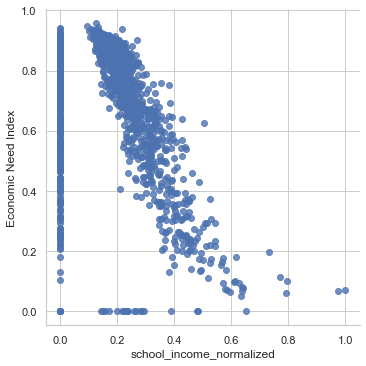

In [71]:
sns.lmplot(x='school_income_normalized', y='Economic Need Index', data=df,
           fit_reg=False) # No regression line
        

<a id='avg_school_income_comparison'></a>
# Average School Income Comparison
***

**Interesting Find:** Looks like the breaking point for school income of **Community Schools** are at around **$50k**

**Interesting Find:** **Non Community Schools** receive an income up to **over $175k**!


Text(0.5, 1.0, 'Community School VS Not Community School Income')

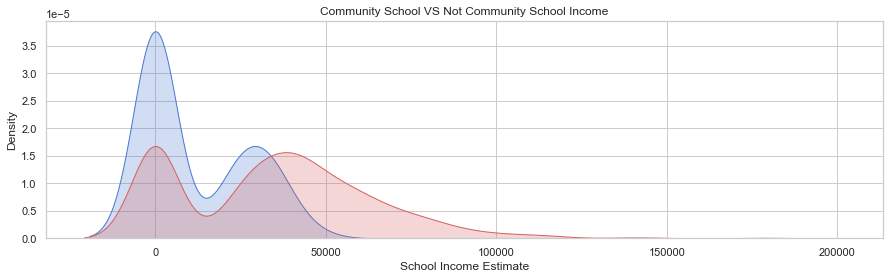

In [72]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['Community School?'] == 'Yes'),'School Income Estimate'] , color='b',shade=True, label='Community School')
ax=sns.kdeplot(df.loc[(df['Community School?'] == 'No'),'School Income Estimate'] , color='r',shade=True, label='Not Community School')
plt.title('Community School VS Not Community School Income')

<a id='economic_need'></a>
# Economic Need Index Distribution
***

**Interesting Find:**

**Community Schools** definitely need more help and a majority of them are within the **Economic Need Index** of **90%**.

**Non Community Schools** have a wide distribution of their Economic Need Index scores, having a majority at the **80%** score.

Text(0.5, 1.0, 'Community School VS Not Community School Economic Need Index')

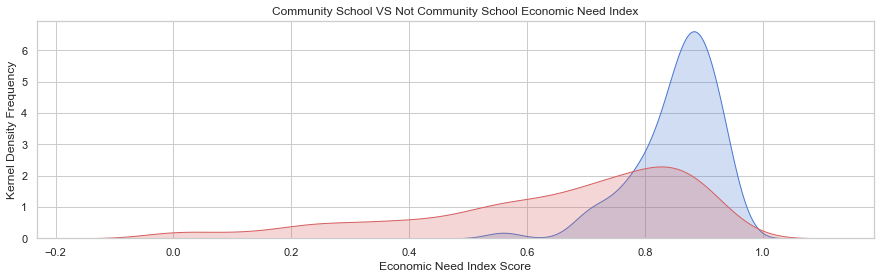

In [73]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['Community School?'] == 'Yes'),'Economic Need Index'] , color='b',shade=True, label='Community School')
ax=sns.kdeplot(df.loc[(df['Community School?'] == 'No'),'Economic Need Index'] , color='r',shade=True, label='Not Community School')
plt.xlabel('Economic Need Index Score')
plt.ylabel('Kernel Density Frequency')
plt.title('Community School VS Not Community School Economic Need Index')

<img src = 'https://cdn.dribbble.com/users/736061/screenshots/3203751/shot_01_boy_1.gif'/>

<a id='school_per_city'></a>
# Number of Schools Per City
***

The **Top 3 Cities** with the most schools are:
1. **Brooklyn**: 411
2. **Bronx**: 297
3. **New York **: 232

In [74]:
city = df.groupby('City')['Zip'].count().reset_index().sort_values('Zip', ascending=False).reset_index(drop=True)
city_community = df[df['Community School?'] == 'Yes'].groupby('City')['Zip'].count().reset_index().sort_values('Zip', ascending=False).reset_index(drop=True)

city_merge = pd.merge(city, city_community, how='left', on='City')
city_merge.fillna(0, inplace=True)
city_merge['Zip_y'] = city_merge['Zip_y'].astype(int)

top_10_city = city_merge.iloc[:10,]
top_10_city = top_10_city.rename(columns={"Zip_x":'Total Count', "Zip_y":'Community Count'})
top_10_city

,City,Total Count,Community Count
0,BROOKLYN,411,24
1,BRONX,297,34
2,NEW YORK,232,12
3,STATEN ISLAND,60,1
4,JAMAICA,32,1
5,FLUSHING,30,0
6,LONG ISLAND CITY,21,1
7,BAYSIDE,13,0
8,FAR ROCKAWAY,13,2
9,SPRINGFIELD GARDENS,11,0


### Top 10 Schools Per City Distribution

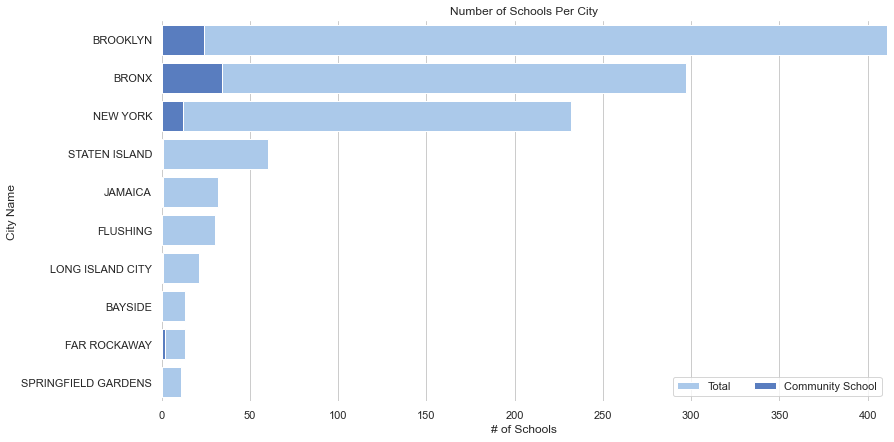

In [75]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(13, 7))

# Plot the total schools per city
sns.set_color_codes("pastel")
sns.barplot(x="Total Count", y='City', data=top_10_city,
            label="Total", color="b")

# Plot the total community schools per city
sns.set_color_codes("muted")
sns.barplot(x="Community Count", y="City", data=top_10_city,
            label="Community School", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 411), ylabel="City Name", title='Number of Schools Per City',
       xlabel="# of Schools")
sns.despine(left=True, bottom=True)

## Top 10 Cities and School Income 

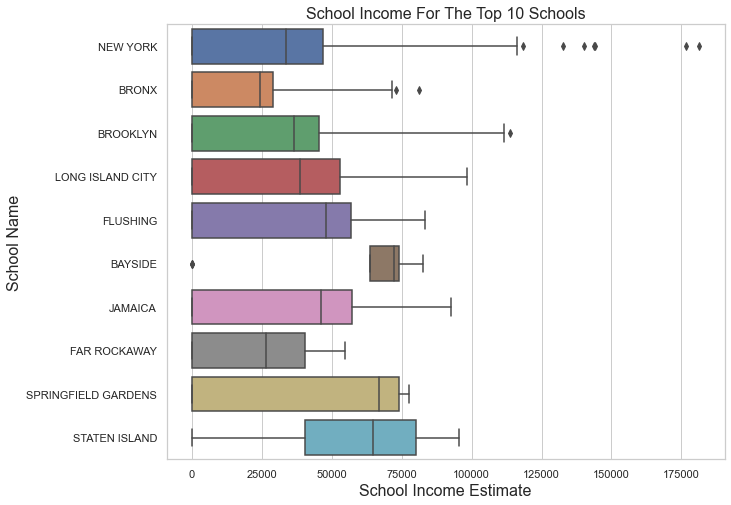

In [76]:
top10_city_list = list(top_10_city.City)

temp=df[df.City.isin(top10_city_list)]
plt.figure(figsize=(10,8))
sns.boxplot( x='School Income Estimate', y='City',data=temp)
plt.title("School Income For The Top 10 Schools", fontsize=16)
plt.xlabel("School Income Estimate", fontsize=16)
plt.ylabel("School Name", fontsize=16)
plt.show();

# SHSAT Registration Content
***

In [77]:
shsat.head(3)

,DBN,School name,Year of SHST,Grade level,Enrollment on 10/31,Number of students who registered for the SHSAT,Number of students who took the SHSAT
0,05M046,P.S. 046 Arthur Tappan,2013,8,91,31,14
1,05M046,P.S. 046 Arthur Tappan,2014,8,95,26,7
2,05M046,P.S. 046 Arthur Tappan,2015,8,73,21,10


# Total SHSAT Registration Count Per School (2013-2016)
***

**Interesting Find:**
- The most registration for the SHSAT occurred in **2014** with a count of **838** registrations.
- The top 3 schools that registered for the SHSAT were from **KIPP, Columbia Secondary School, and Democracy Prep**.

<a id='registration_per_year'></a>
### Total Registrations Per Year

Year **2014** has the highest amount of registrations at **838**, but then it falls off in the following years.

In [78]:
registration_per_year = pd.DataFrame(shsat.groupby('Year of SHST')['Number of students who registered for the SHSAT'].sum()).reset_index()
registration_per_year

,Year of SHST,Number of students who registered for the SHSAT
0,2013,660
1,2014,838
2,2015,597
3,2016,575


ValueError: s must be a scalar, or the same size as x and y

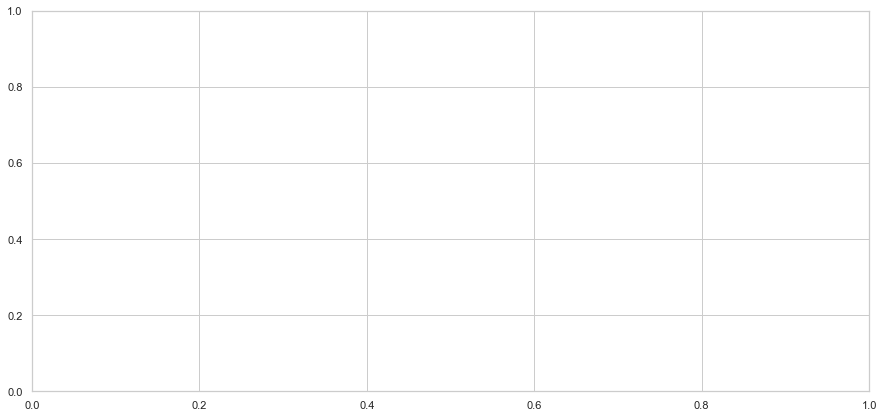

In [79]:
# Testing...
shsat_schools = list(shsat['DBN'].unique())
shsat_schools_list = '|'.join(shsat_schools)

df['Registered SHSAT'] = df['Location Code'].str.contains(shsat_schools_list)

registered_SHSAT_schools = df[df['Registered SHSAT'] == True]
registered_SHSAT_schools.groupby('School Name').mean()

registered_SHSAT_schools.plot(kind="scatter", x="Longitude", y="Latitude",
    s=absent_11['Economic Need Index']*100, c="School Income Estimate", cmap=plt.get_cmap("jet"),label='Schools', title='Schools with 10% Absent Rate',
    colorbar=True, alpha=0.3, figsize=(15,7))

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(y=registration_per_year['Number of students who registered for the SHSAT'], x=registration_per_year['Year of SHST'], alpha=0.6)
plt.title("Number of SHSAT Registrations Per Year", fontsize=16)
plt.xlabel("Year", fontsize=16)
plt.ylabel("# of SHSAT Registration", fontsize=16)
plt.show()

<a id='registration_count'></a>
# Registration Count Per School Distribution
***

### Top 10 Schools With The Most Registrations 

In [80]:
# Create a dataframe of # of students who took the SHSAT
school_take = shsat.groupby('School name')['Number of students who took the SHSAT'].sum().reset_index().sort_values('Number of students who took the SHSAT', ascending=False).reset_index(drop=True)

# Create a dataframe of SHSAT Registration Count
school_registrations = shsat.groupby('School name')['Number of students who registered for the SHSAT'].sum().reset_index().sort_values('Number of students who registered for the SHSAT', ascending=False).reset_index(drop=True)

# Merge the DataFrames
registration_merge = pd.merge(school_registrations, school_take, how='left', on='School name')
registration_merge.head(10)

,School name,Number of students who registered for the SHSAT,Number of students who took the SHSAT
0,KIPP Infinity Charter School,296,65
1,KIPP STAR College Prep Charter School,292,96
2,Columbia Secondary School,253,179
3,Democracy Prep Endurance Charter School,194,94
4,Democracy Prep Charter School,145,100
5,Frederick Douglass Academy,122,65
6,I.S. M286 Renaissance Leadership Academy,109,28
7,P.S. 129 John H. Finley,108,48
8,P.S. 046 Arthur Tappan,98,39
9,KAPPA IV,97,40


# SHSAT Registration Distribution Per School
***

Below is the distribution of SHSAT Registrations and the amount of students who actually took it.

It's really interesting to see the actual amount of students who took the test and registered. 

**Why is it that some schools have a higher Take-to-Register rate?**

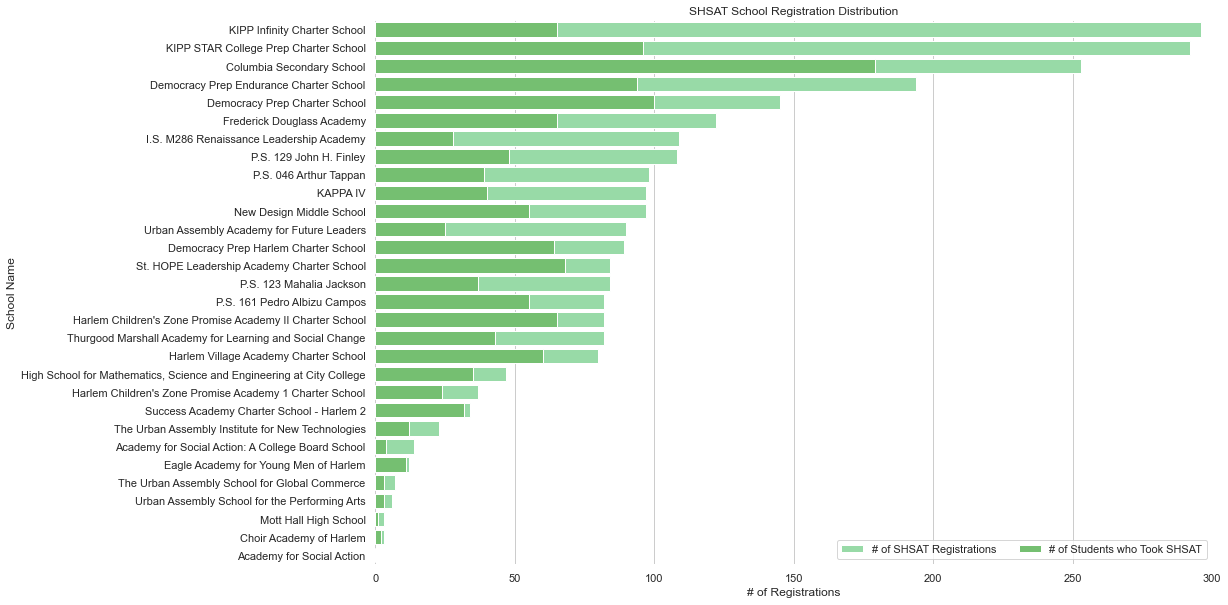

In [81]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))

# Plot the total schools per city
sns.set_color_codes("pastel")
sns.barplot(x="Number of students who registered for the SHSAT", y='School name', data=registration_merge,
            label="# of SHSAT Registrations", color="g")

# Plot the total community schools per city
sns.set_color_codes("muted")
sns.barplot(x="Number of students who took the SHSAT", y="School name", data=registration_merge,
            label="# of Students who Took SHSAT", color="g")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 300), ylabel="School Name", title='SHSAT School Registration Distribution',
       xlabel="# of Registrations")
sns.despine(left=True, bottom=True)

<a id='clustering'></a>
# K-Means Clustering: School Economic Need and Income Estimate
***
Let's see if there is any sort of cluster of schools:

- **Critical Help (Red)**: Schools in red have a high economic need with an **Estimate Income < 50,000**
- **Moderate Help (Green)**: Schools in green have a low-moderate economic need with an **Estimate Income < 50,000-75,000**
- **Low Help (Blue)**: Schools in blue have a low economic need with an **Estimate Income > 75,000**


### Elbow Plot: Three Cluster seems to be the magic number

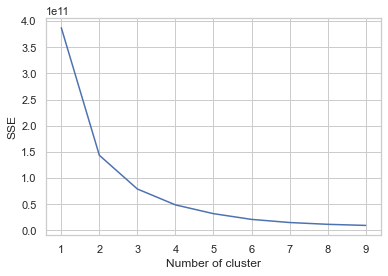

In [82]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df_zero = df[df['Economic Need Index'] != 0]
df_zero2 = df_zero[df_zero['School Income Estimate'] != 0]

data = df_zero2[['Economic Need Index', 'School Income Estimate']]

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
    data["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

### K-Means Clustering

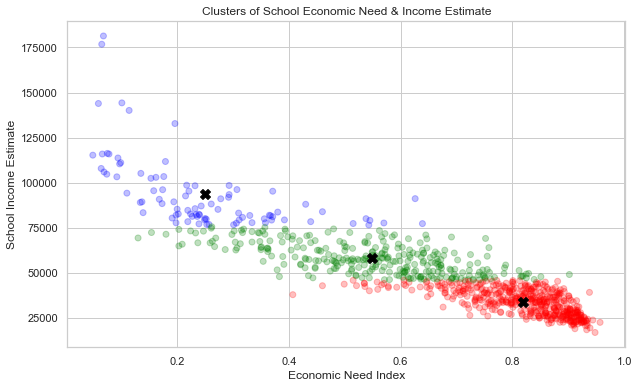

In [83]:
# Import KMeans Model
from sklearn.cluster import KMeans

# Graph and create 3 clusters of Employee Turnover
kmeans = KMeans(n_clusters=3,random_state=2)
kmeans.fit(df_zero2[["Economic Need Index","School Income Estimate"]])

kmeans_colors = ['green' if c == 0 else 'red' if c == 2 else 'yellow' if c == 3 else 'blue' for c in kmeans.labels_]

fig = plt.figure(figsize=(10, 6))
plt.scatter(x="Economic Need Index",y="School Income Estimate", data=df_zero2,
            alpha=0.25,color = kmeans_colors)
plt.xlabel("Economic Need Index")
plt.ylabel("School Income Estimate")
plt.scatter(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],color="black",marker="X",s=100)
plt.title("Clusters of School Economic Need & Income Estimate")
plt.show()

# Final Note
***

Here are some key takeaways:

### Geography
- **Central and Upper** New York have schools that are mostly in need of help
- **Central and Upper** New York contains most of the **underperforming students**

### Race
- Majority of **Blacks** attend schools in the **Central** part of New York
- Majority of **Hispanics** attend schools in the **Upper** part of New York
- Schools with **30% or more** Absent Rate have an average of **95% Black/Hispanic Dominated Schools**
- On average, **Black/Hispanic** have a lower **ELA & Math** Performance Scores than **White/Asian**
- Overall, **Asians** received the most **4s** in **ELA and Math Performance**.

### Conclusion
To keep it short:
- **Services** are needed for mostly the **Hispanic/Black** student population 
- Which are **located** mostly in **Central and Upper** Parts of New York. 

# The Action Plan
***

There's still a lot to explore, but **if you have any suggestions on how we can tackle this problem and pinpoint what schools/students** would have the most impact from extra support please leave a comment below or message me!

This is the begginning of the EDA phase!


# Work Still In Progress
This notebook will always be a work in progress. If this helped you in anyway, I'd love to see just **one upvote :)**. Please **leave any comments** about further improvements to the notebook! Any feedback or constructive criticism is greatly appreciated. Thank you guys!

<a id='additional_sat'></a>
# Addtional Data: New York City SAT Results (2012)
***

In [84]:
sat = pd.read_csv('../input/new-york-city-sat-results/2012-sat-results.csv')
sat = sat.rename(columns={"DBN":"Location Code"})

sat_merge = pd.merge(df, sat, on='Location Code', how='left')
sat_merge[sat_merge['SCHOOL NAME'].isnull() == False].shape

FileNotFoundError: [Errno 2] No such file or directory: '../input/new-york-city-sat-results/2012-sat-results.csv'

In [ ]:
sat_merge2 = sat_merge[sat_merge['SCHOOL NAME'].isnull() == False]
sat_merge2['SAT Math Avg. Score'] = sat_merge2['SAT Math Avg. Score'].replace("s","0")
sat_merge2['SAT Critical Reading Avg. Score'] = sat_merge2['SAT Critical Reading Avg. Score'].replace("s","0")
sat_merge2['SAT Writing Avg. Score'] = sat_merge2['SAT Writing Avg. Score'].replace("s","0")

In [ ]:
sat_merge2['SAT Critical Reading Avg. Score'] = pd.to_numeric(sat_merge2['SAT Critical Reading Avg. Score'])
sat_merge2['SAT Writing Avg. Score'] = pd.to_numeric(sat_merge2['SAT Writing Avg. Score'])
sat_merge2['SAT Math Avg. Score'] = pd.to_numeric(sat_merge2['SAT Math Avg. Score'])
sat_merge2.head(1)

In [ ]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols=2, figsize=(15, 6))

sat_merge2.plot(kind="scatter", x="Average Math Proficiency", y="SAT Math Avg. Score", ax=axes[0],
    s=sat_merge2['Economic Need Index']*100, c="School Income Estimate", cmap=plt.get_cmap("jet"),label='Schools', title='Math SAT Scores VS Math Proficiency Score',
    colorbar=True, alpha=0.3, figsize=(15,7))

sat_merge2.plot(kind="scatter", x="SAT Critical Reading Avg. Score", y="SAT Writing Avg. Score", ax=axes[1],
    s=sat_merge2['Economic Need Index']*100, c="School Income Estimate", cmap=plt.get_cmap("jet"),label='Schools', title='SAT Writing VS Reading Scores',
    colorbar=True, alpha=0.3, figsize=(15,7))

<a id='additional_income'></a>
# Additional Data: NYC Income Census Population
***

Let's do some quick analysis on NYC Income Data so we can get a general overview about the population:

In [ ]:
pop = pd.read_csv('../input/nys-nyserda-low-to-moderate-income-census-populat/nyserda-low-to-moderate-income-new-york-state-census-population-analysis-dataset-average-for-2013-2015.csv')
nyc_pop = pop[pop['County / County Group']=='New York']

In [ ]:
nyc_income = pd.DataFrame(nyc_pop['Income Groups'].value_counts()).reset_index()
nyc_income

In [ ]:
nyc_pop['Percent of Poverty Level']
plt.figure(figsize=(10,6))
sns.barplot(y=nyc_income['Income Groups'], x=nyc_income['index'], alpha=0.6)
plt.title("Income Groups of NYC", fontsize=16)
plt.xlabel("Income Groups Level", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.xticks(rotation=90)
plt.show()

In [ ]:
race_income = pd.DataFrame(nyc_pop.groupby(['Race / Ethnicity', 'Income Groups'])['Income Groups'].count())
race_income

<img src='https://cdn.dribbble.com/users/759099/screenshots/3584436/linked_in2.gif'/>


## Let's Connect!

If anybody would like to discuss any other projects or just have a chat about data science topics, I'll be more than happy to connect with you on:

**LinkedIn**: https://www.linkedin.com/in/randylaosat/

**My Website**: http://claoudml.co
